# Around the world in 80 ways - summary

[Introduction](../../introduction.ipynb) > Round-up

Having learnt about map projections, and their various trade-offs, we subsequently introduced cartopy's matplotlib interface for handling vector and raster data.

We found the ``GeoAxes``'s ``imshow()`` and ``add_geometries()`` methods are just two of the ways of handling raster and vector data respectively. 

Finally, we looked at a number of approaches and tools that allowed us to interoperate between the two main classes of geospatial data. We used matplotlib, scikit-image, Iris and XArray to work with raster data, and Shapely and Fiona to work with vector data. Whilst most of these tools were never designed to handle Spherical data, cartopy gives us a means to work with it seamlessly.


We hope this tutorial has given you a solid understanding of what cartopy is, though there remains so much that we haven't covered. These include:

 * OGC web map (tile) service ingestion
 * Cartopy's Shuttle Radar Topography Mission interface
 * Web map tile creation
 * A (prototype) bridge to MapProxy for creating a WMS service 
 * Vector field transforms (wind barbs, streamlines etc.)
 * More gridline control
 * Cartopy's SlippyImageArtist for drag-able on-the-fly re-rendering
 

The final excercise brings together much of what we have learnt to reproduce the image published on Wikipedia:

![Wikipedia route](../resources/640px-Around_the_World_in_Eighty_Days_map.png)

**Exercise 6.1:** Re-create the Wikipedia image. Include:
 * Robinson projection with a central longitude of 11.25
 * the 1880 countries dataset (found in ``../resources/1880_countries/cntry1880.shp``) filled in gray
 * place labels using ``plt.text`` (a script font is available in ``../resources/freebooter-font/FREEBSC_.ttf``)
 * the route (the Great circles route. **Extension**: The extracted GeoJSON from the raster_to_vector section)

In [1]:
places = {'London': (-0.1276474, 51.5073219),
          'Suez': (32.537086, 29.974498),
          'Bombay': (72.8882172, 19.1334321),
          'Calcutta': (88.3476023, 22.5677459),
          'Hong Kong': (114.1628131, 22.2793278),
          'Yokohama': (139.636768, 35.444991),
          'San Francisco': (-122.4629897, 37.7647993),
          'New York': (-73.9866136, 40.7306458)}

<IPython.core.display.Javascript object>


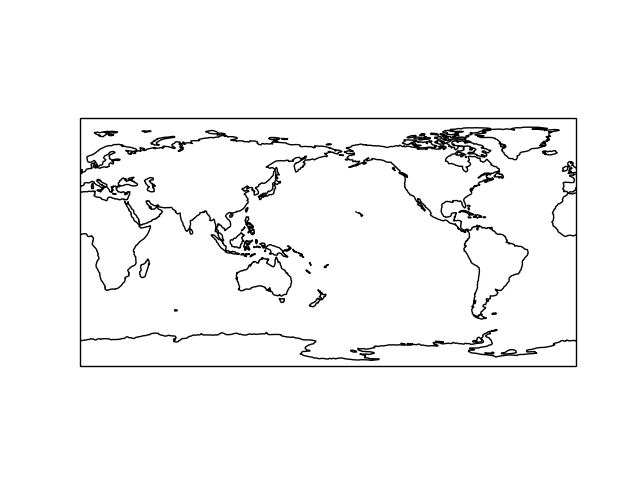

In [3]:
# EXERCISE 6.1 part 1:
%matplotlib notebook
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
pc = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=pc)

ax.coastlines()
plt.show()


<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 6.1 part 1</b></summary>
<pre>
%matplotlib notebook
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np


def create_axes():
    plt.figure(figsize=(10, 6))
    ax = plt.axes(
        projection=ccrs.Robinson(central_longitude=11.25))
    ax.set_global()
    ax.outline_patch.set_edgecolor('white')
    return ax

    
def add_1880_countries(ax):
    # 1880 countries
    fname = '../resources/1880_countries/cntry1880.shp'
    reader = shpreader.Reader(fname)
    light_gray = np.array([183, 183, 183]) / 255
    ax.add_geometries(
        list(reader.geometries()), ccrs.PlateCarree(),
        edgecolor='white', facecolor=light_gray, linewidth=0.2)


ax = create_axes()
add_1880_countries(ax)
plt.show()
</pre>
</details>

In [ ]:
# EXERCISE 6.1 part 2:




<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 6.1 part 2</b></summary>
<pre>
import matplotlib.font_manager as fm


def add_fancy_labels(ax):
    fpath = "../resources/freebooter-font/FREEBSC_.ttf"
    prop = fm.FontProperties(fname=fpath)
    
    # Define some pretty text alignments for the labels.
    # Nothing automatic here, it is all done by hand:
    labels = {'London': {'ha': 'center', 'va': 'bottom'},
              'Suez': {'ha': 'center', 'va': 'bottom'},
              'Bombay': {'ha': 'right', 'va': 'bottom'},
              'Calcutta': {'ha': 'center', 'va': 'bottom'},
              'Hong Kong': {'ha': 'left', 'va': 'top'},
              'Yokohama': {'ha': 'center', 'va': 'bottom'},
              'San Francisco': {'ha': 'center', 'va': 'bottom'},
              'New York': {'ha': 'center', 'va': 'top'},
             }

    for place, kwargs in labels.items():
        lon, lat = places[place]
        ax.plot(lon, lat, 'ok', transform=ccrs.PlateCarree())
        ax.text(lon, lat, ' {} '.format(place), transform=ccrs.PlateCarree(),
                fontproperties=prop, fontsize=16, weight='black',
                **kwargs)
        
ax = create_axes()
add_1880_countries(ax)
add_fancy_labels(ax)
plt.show()
</pre>
</details>

In [ ]:
# EXERCISE 6.1 part 3:




<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 6.1 part 3</b></summary>
<pre>
# EXERCISE 6.1 part 3:


import shapely.geometry as sgeom
    
def draw_route(ax):
    destinations = [
        'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
        'Yokohama', 'San Francisco', 'New York', 'London']

    coords = np.stack([places[place] for place in destinations])
    route = sgeom.LineString(coords)
    ax.add_geometries(
        [route], ccrs.Geodetic(),
        edgecolor='blue', facecolor='none', linewidth=2)
        
ax = create_axes()
add_1880_countries(ax)
add_fancy_labels(ax)
draw_route(ax)

plt.show()
</pre>
</details>

In [ ]:
# EXERCISE 6.1 part 3 extension:




<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 6.1 part 3 extension</b></summary>
<pre>

import json
from shapely.geometry import mapping, shape


def draw_route_geojson(ax):
    route_geojson = 'geospatial/route.geojson'

    # Extension: The ``route.geojson`` created in raster to vector.
    with open(route_geojson, 'r') as fh:
        route = shape(json.load(fh))
    ax.add_geometries([route], ccrs.PlateCarree(),
                      edgecolor='blue', facecolor='none', linewidth=2)


ax = create_axes()
add_1880_countries(ax)
add_fancy_labels(ax)
draw_route_geojson(ax)
</pre>
</details>

## Acknowledgements

* The open source "geospatial" stack!
* Met Office for giving us time to work on cartopy
* SciPy conference
* Kelsey Jordahl's [SciPy 2015 tutorial](https://github.com/kjordahl/SciPy-Tutorial-2015)
* Jules Verne and his wonderful book: [Around the world in 80 days](http://www.gutenberg.org/ebooks/103) (free!)


## Sprint with us!

We will be sprinting both days on cartopy related themes, please feel free to join us!